[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3. https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [1]:
df_bike_orig<-read.csv('data/bike-sharing-hour.csv')

In [2]:
head(df_bike_orig)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [3]:
summary(df_bike_orig)

    instant         dteday              season            yr        
 Min.   :    1   Length:17379       Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Mode  :character   Median :3.000   Median :1.0000  
 Mean   : 8690                      Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379                      Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weathersit         te

In [10]:
df_bike_lite <- df_bike_orig
df_bike_lite$instant <- NULL
df_bike_lite$dteday <- NULL
head(df_bike_lite)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [69]:
df_bike_orig <- df_bike_orig %>% dplyr::select(-instant, -dteday)

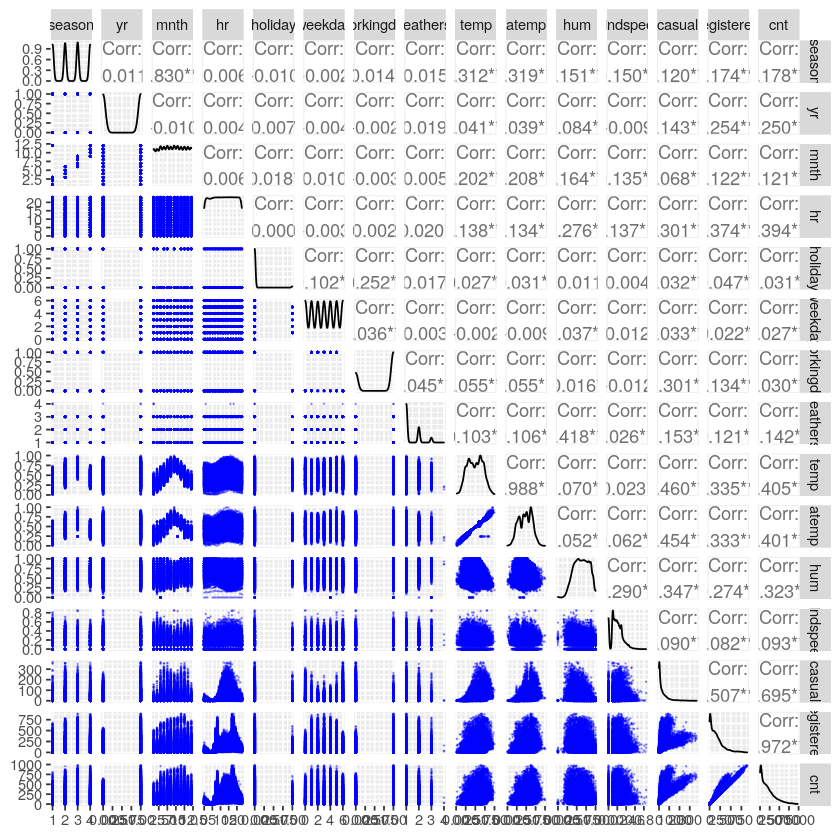

In [11]:
library(tidyverse)
library(ggplot2)
library(GGally)
ggpairs(df_bike_orig %>% select(-instant, -dteday), 
        #lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

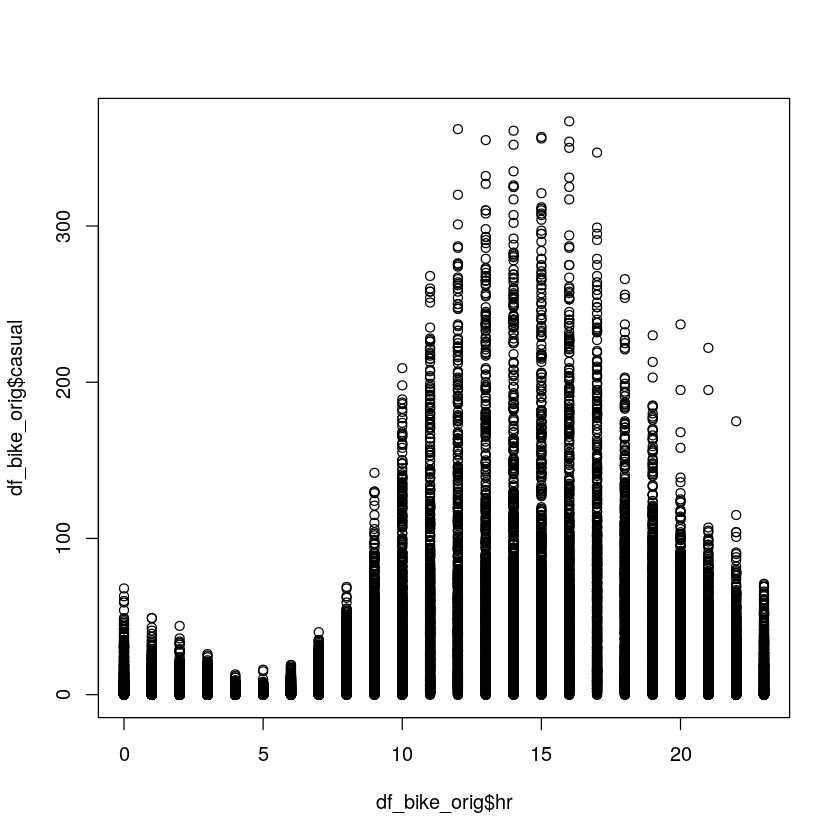

In [41]:
plot(df_bike_orig$hr, df_bike_orig$casual)

In [51]:
df_bike_orig <- df_bike_orig %>% mutate(hr_i = sin(hr/24*2*pi),
                                        hr_j = cos(hr/24*2*pi)
                                       )

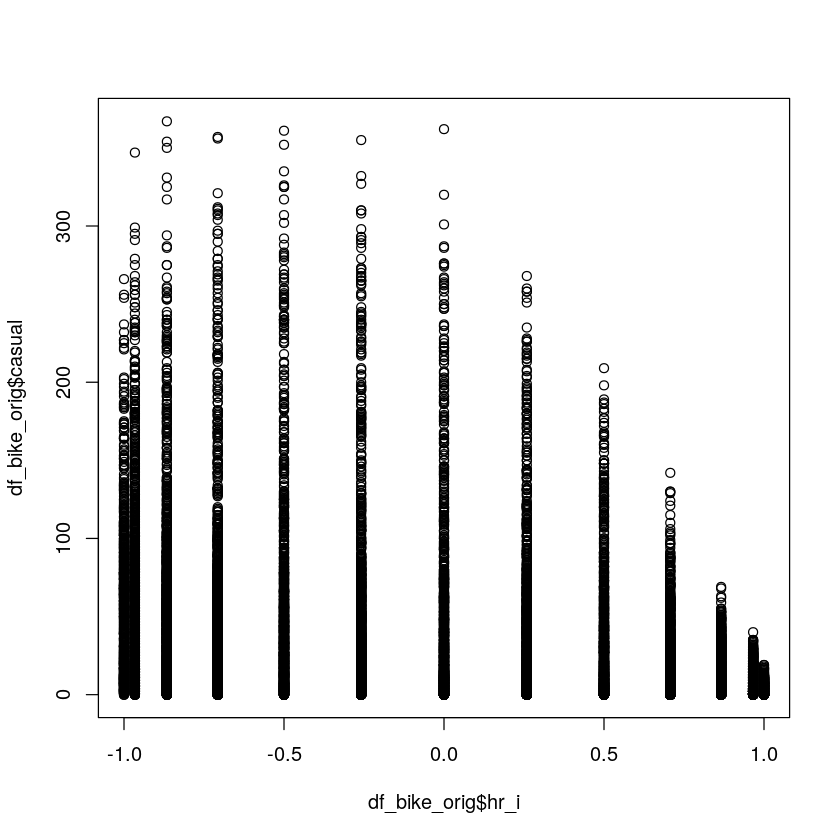

In [53]:
plot(df_bike_orig$hr_i, df_bike_orig$casual)

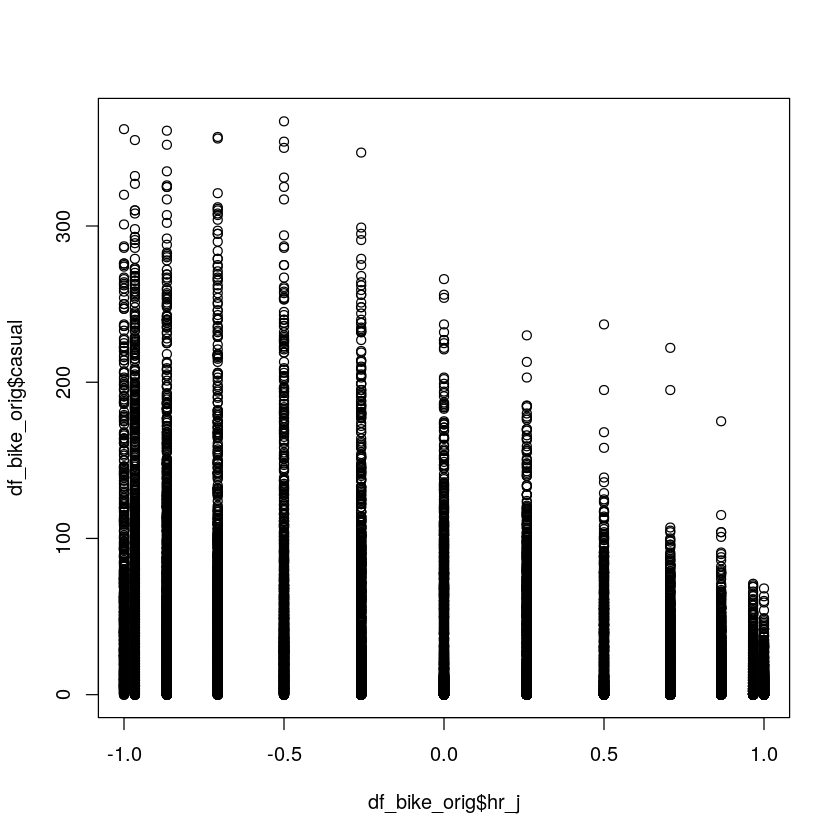

In [54]:
plot(df_bike_orig$hr_j, df_bike_orig$casual)

In [70]:
set.seed(1)
idx<-sample(1:nrow(df_bike_orig),nrow(df_bike_orig)*0.7)
df_bike_train <- df_bike_orig[idx,]
df_bike_test <- df_bike_orig[-idx,]
head(df_bike_train)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_i,hr_j
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
4775,3,0,7,20,0,5,1,1,0.84,0.8182,0.56,0.0000,46,166,212,-0.8660254,0.5000000
13218,3,1,7,22,0,1,1,2,0.72,0.6667,0.58,0.1045,35,189,224,-0.5000000,0.8660254
10539,1,1,3,5,0,2,1,2,0.52,0.5000,0.94,0.0000,0,20,20,0.9659258,0.2588190
8462,1,0,12,5,0,6,0,2,0.32,0.3182,0.66,0.1642,1,3,4,0.9659258,0.2588190
4050,3,0,6,15,0,3,1,2,0.82,0.7879,0.56,0.2836,32,114,146,-0.7071068,-0.7071068
13499,3,1,7,15,0,6,0,3,0.60,0.5455,0.88,0.2537,148,232,380,-0.7071068,-0.7071068


In [31]:
model<-lm(df_bike_train, formula = casual ~ atemp + hr+hum)
summary(model)


Call:
lm(formula = casual ~ atemp + hr + hum, data = df_bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-85.675 -21.392  -6.390   9.182 300.324 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.22410    1.80441    6.22 5.12e-10 ***
atemp       116.01055    2.09148   55.47  < 2e-16 ***
hr            1.19678    0.05408   22.13  < 2e-16 ***
hum         -71.52448    1.93185  -37.02  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.38 on 12161 degrees of freedom
Multiple R-squared:  0.3382,	Adjusted R-squared:  0.3381 
F-statistic:  2072 on 3 and 12161 DF,  p-value: < 2.2e-16


casual = 116*atemp + 1.19*hr - 71.5*hum

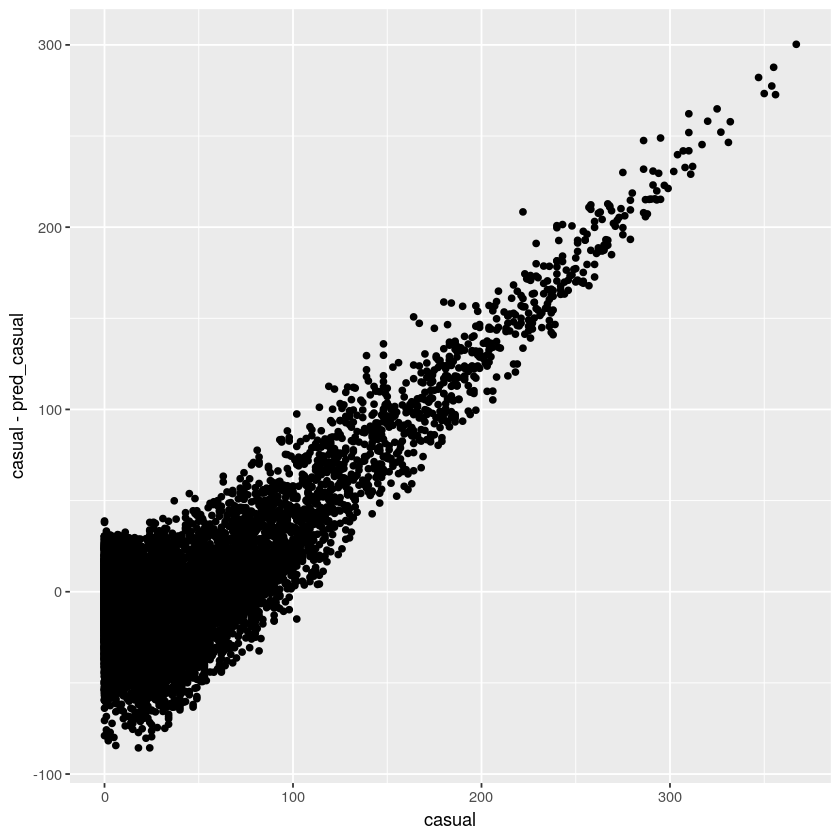

In [34]:
df_bike_train$pred_casual <- predict(model, df_bike_train)
ggplot(df_bike_train, aes(x=casual, y=casual-pred_casual))+geom_point()

In [38]:
#ggplot(df_bike_train, aes(x=casual, y=pred_casual))+geom_point()+geom_abline(intercept = 0, slope = 1, color='red')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



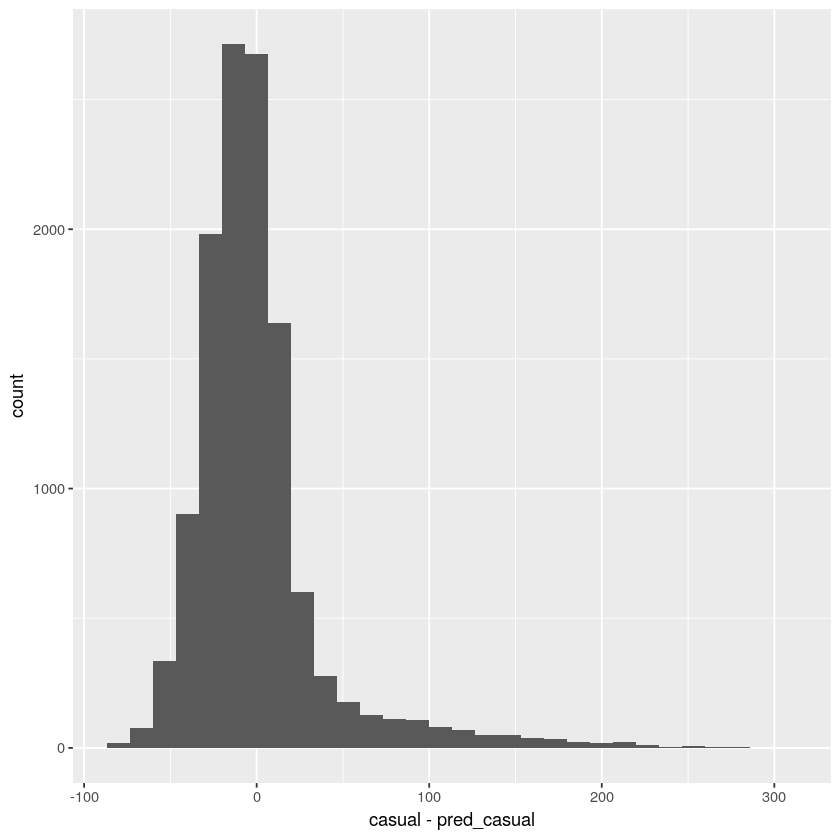

In [39]:
ggplot(df_bike_train, aes(x=casual-pred_casual))+geom_histogram()

In [60]:
model2<-lm(df_bike_train, formula = casual ~ atemp + hr_i+hr_j+ hum)
summary(model2)


Call:
lm(formula = casual ~ atemp + hr_i + hr_j + hum, data = df_bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.217 -18.859  -4.513  10.032 285.860 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.6173     1.5165   7.661 1.99e-14 ***
atemp       100.0923     1.9525  51.264  < 2e-16 ***
hr_i        -18.0061     0.5099 -35.314  < 2e-16 ***
hr_j        -21.8184     0.4889 -44.625  < 2e-16 ***
hum         -38.3153     1.9158 -19.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.15 on 12160 degrees of freedom
Multiple R-squared:  0.4424,	Adjusted R-squared:  0.4422 
F-statistic:  2412 on 4 and 12160 DF,  p-value: < 2.2e-16


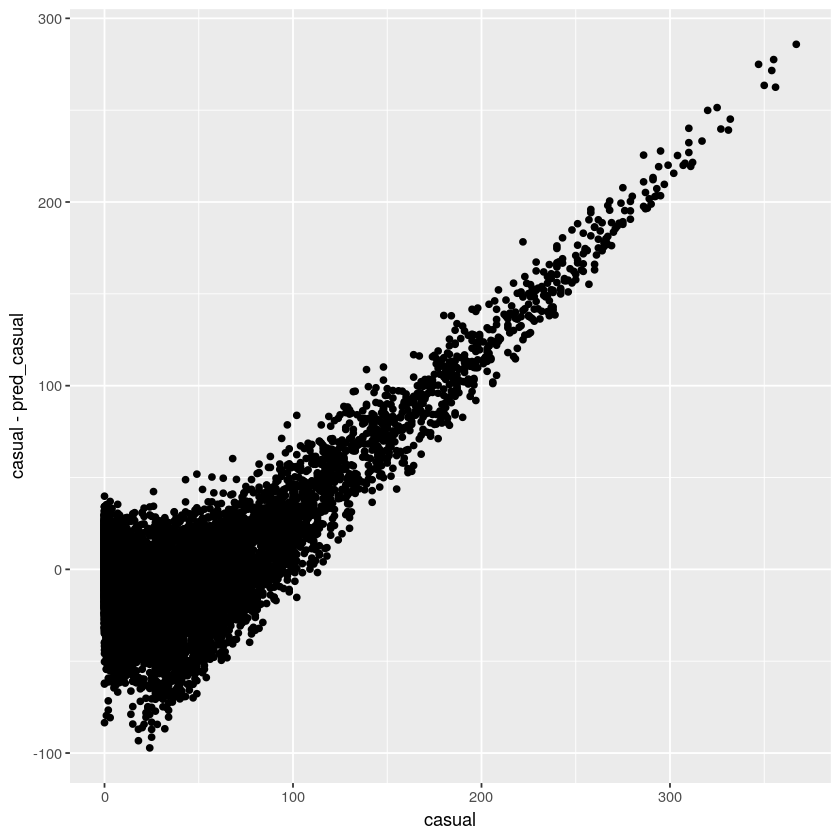

In [61]:
df_bike_train$pred_casual <- predict(model2, df_bike_train)
ggplot(df_bike_train, aes(x=casual, y=casual-pred_casual))+geom_point()

In [72]:
model2<-lm(df_bike_train %>% dplyr::select(-cnt,-registered) , formula = casual ~ .)
summary(model2)


Call:
lm(formula = casual ~ ., data = df_bike_train %>% dplyr::select(-cnt, 
    -registered))

Residuals:
    Min      1Q  Median      3Q     Max 
-81.024 -18.534  -2.944  12.798 251.868 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.62070    1.94848  15.715  < 2e-16 ***
season        2.92620    0.49191   5.949 2.78e-09 ***
yr           11.01306    0.58220  18.916  < 2e-16 ***
mnth         -0.54522    0.15382  -3.544 0.000395 ***
hr           -0.39131    0.06714  -5.828 5.74e-09 ***
holiday     -10.47216    1.80307  -5.808 6.48e-09 ***
weekday       1.23209    0.14571   8.456  < 2e-16 ***
workingday  -34.13700    0.64570 -52.868  < 2e-16 ***
weathersit   -4.29114    0.52749  -8.135 4.52e-16 ***
temp         56.81635    9.52887   5.963 2.55e-09 ***
atemp        34.01313   10.70651   3.177 0.001492 ** 
hum         -26.56227    2.02374 -13.125  < 2e-16 ***
windspeed    -9.81891    2.60632  -3.767 0.000166 ***
hr_i        -22.43128    0.69973 -32.05

In [65]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [73]:
stepAIC(model2)

Start:  AIC=84252.12
casual ~ season + yr + mnth + hr + holiday + weekday + workingday + 
    weathersit + temp + atemp + hum + windspeed + hr_i + hr_j

             Df Sum of Sq      RSS   AIC
<none>                    12355760 84252
- atemp       1     10263 12366023 84260
- mnth        1     12776 12368536 84263
- windspeed   1     14433 12370193 84264
- holiday     1     34304 12390063 84284
- hr          1     34544 12390304 84284
- season      1     35985 12391745 84286
- temp        1     36154 12391914 84286
- weathersit  1     67300 12423059 84316
- weekday     1     72712 12428472 84322
- hum         1    175192 12530952 84421
- yr          1    363890 12719649 84603
- hr_i        1   1045068 13400828 85238
- hr_j        1   2739203 15094963 86686
- workingday  1   2842405 15198165 86769



Call:
lm(formula = casual ~ season + yr + mnth + hr + holiday + weekday + 
    workingday + weathersit + temp + atemp + hum + windspeed + 
    hr_i + hr_j, data = df_bike_train %>% dplyr::select(-cnt, 
    -registered))

Coefficients:
(Intercept)       season           yr         mnth           hr      holiday  
    30.6207       2.9262      11.0131      -0.5452      -0.3913     -10.4722  
    weekday   workingday   weathersit         temp        atemp          hum  
     1.2321     -34.1370      -4.2911      56.8163      34.0131     -26.5623  
  windspeed         hr_i         hr_j  
    -9.8189     -22.4313     -23.4625  


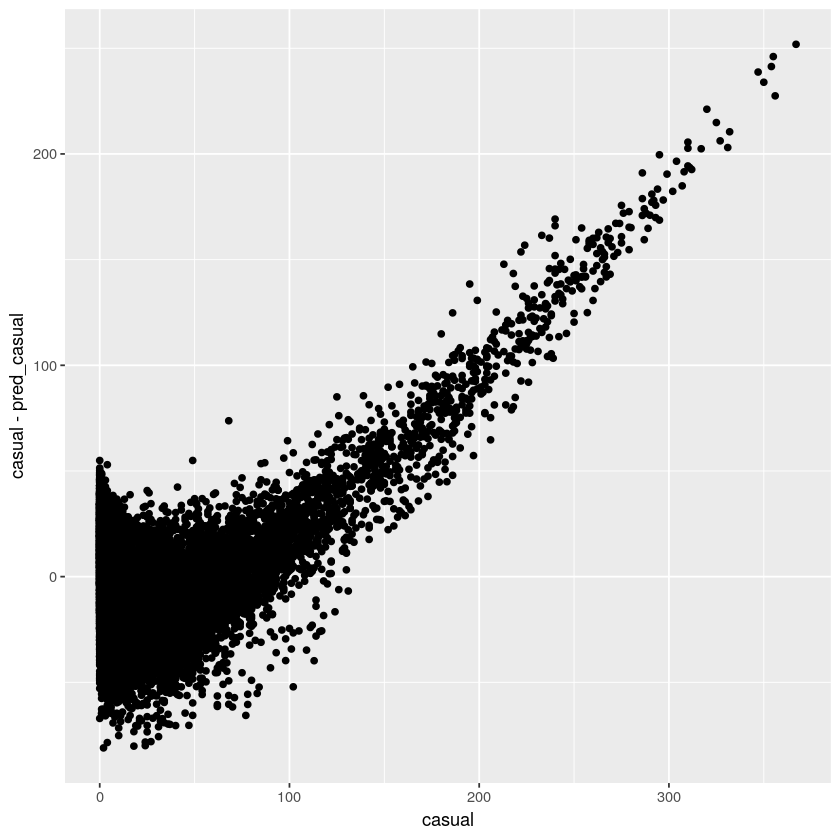

In [74]:
df_bike_train$pred_casual <- predict(model2, df_bike_train)
ggplot(df_bike_train, aes(x=casual, y=casual-pred_casual))+geom_point()

In [75]:
caret::postResample(pred=df_bike_train$pred_casual, obs= df_bike_train$casual)


RMSE   Rsquared        MAE 
31.8697510  0.5664496 21.6844687

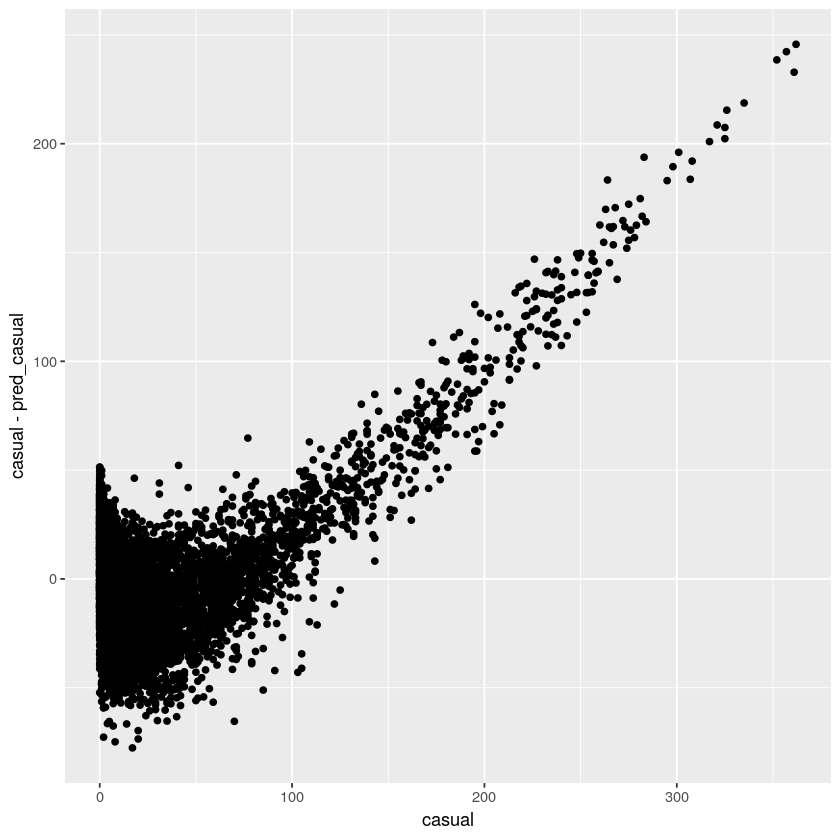

In [76]:
df_bike_test$pred_casual <- predict(model2, df_bike_test)
ggplot(df_bike_test, aes(x=casual, y=casual-pred_casual))+geom_point()

In [78]:
caret::postResample(pred=df_bike_test$pred_casual, obs= df_bike_test$casual)


RMSE   Rsquared        MAE 
33.7183806  0.5706567 22.5912238